In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv('../dataset/songs_one_hot_encoding.csv',
                 encoding='iso-8859-1', na_values='unknown')
df.head()

,peak_pos,weeks,rank,genre,pop,dance pop,pop rap,post-teen pop,r&b,rap,urban contemporary,hip hop,hip pop,southern hip hop,trap music,dirty south rap,pop rock,gangster rap,neo mellow,neo soul
0,7,7,20,"['pop', 'rap']",True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,6,11,7,"['dance pop', 'indie r&b', 'pop', 'r&b', 'urba...",True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False
2,4,11,54,"['canadian pop', 'pop', 'rap']",True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,10,10,43,"['dance pop', 'hip pop', 'pop', 'pop rap', 'rap']",True,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False
4,10,4,71,['k-pop'],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Media rank do rap: 304
Media rank do pop: 675
Media rank do trap: 129


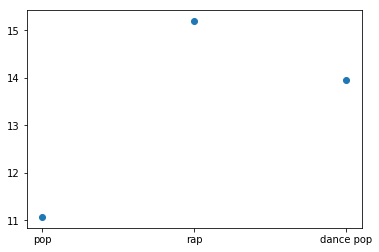

In [3]:
pop_songs = df[df['pop'] == True]
pop_songs_better_than_25 = pop_songs[pop_songs['rank'] <= 25]
rap_songs = df[df['rap'] == True]
rap_songs_better_than_25 = rap_songs[rap_songs['rank'] <= 25]
dance_pop_songs = df[df['dance pop'] == True]
dance_pop_songs_better_than_25 = dance_pop_songs[dance_pop_songs['rank'] <= 25]
x = ['pop', 'rap', 'dance pop']
y = []

y.append(len(pop_songs) / len(pop_songs_better_than_25))
y.append(len(rap_songs) / len(rap_songs_better_than_25))
y.append(len(dance_pop_songs) / len(dance_pop_songs_better_than_25))
plt.scatter(x, y)
print('Media rank do rap: {}'.format(df[df['rap'] == True]['rank'].count()))
print('Media rank do pop: {}'.format(df[df['pop'] == True]['rank'].count()))
print('Media rank do trap: {}'.format(df[df['trap music'] == True]['rank'].count()))

(array([254., 109., 113., 117.,  85., 102.,  98.,  84.,  76.,  81.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

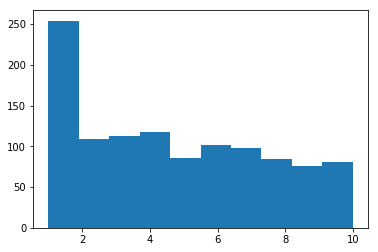

In [4]:
plt.hist(df['peak_pos'])

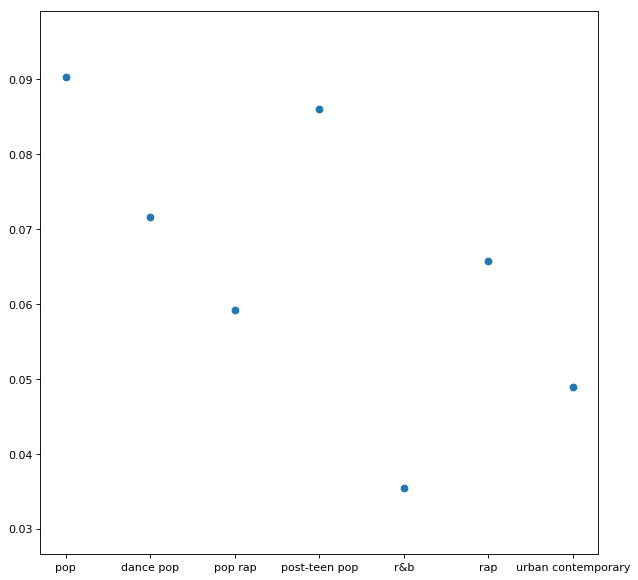

In [5]:
genres = list(df.columns)[4:]
ratio = []
for genre in genres:
    genre_songs = df[df[genre] == True]
    genre_songs_top_25 = genre_songs[genre_songs['rank'] <= 25]
    ratio.append(len(genre_songs_top_25) / len(genre_songs))
figure(num=None, figsize=(9, 9), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(genres[:7], ratio[:7])

Com o gráfico acima, que mostra o ratio entre quantidade de músicas que atingem o top 25 por quantidade de músicas que atingem o top 100 por gênero, que o gênero provavelmente influencia nesse ratio.

75.72705664862009

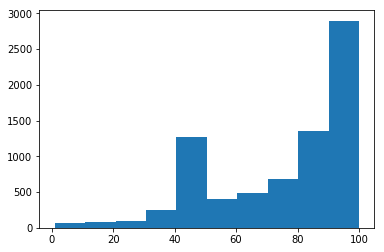

In [6]:
df2 = pd.read_csv('../dataset/billboard_2000_2018_spotify_lyrics.csv',
                 encoding='iso-8859-1', na_values='unknown')
plt.hist(df2['rank'])
df2['rank'].mean()

(array([  1.,   9.,  43., 193., 477., 695., 574., 378., 114.,  16.]),
 array([74.63660372, 74.82540605, 75.01420837, 75.2030107 , 75.39181302,
        75.58061534, 75.76941767, 75.95821999, 76.14702232, 76.33582464,
        76.52462696]),
 <a list of 10 Patch objects>)

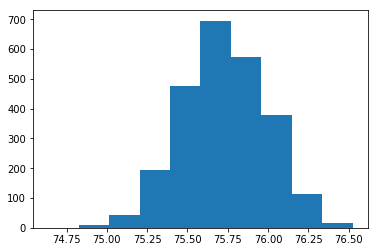

In [7]:
means = []
for _ in range(2500):
    means.append(df2.sample(len(df2), replace=True)['rank'].mean())

plt.hist(means)